# 1. Installing and Import Dependencies



In [1]:
!pip3 install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
# I am running it on CPU but you can download CUDA version for that it's faster and detect more accurately as well    

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [2]:
! git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
# Installing requirements for our project
! cd yolov5 & pip install -r requirements.txt

In [4]:
# Installing our libraries
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ipywidgets import *

# 2 Loading Model


In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') # Choose size of yolov5 as your convenience there are 4 types yolov5 sizes [s=for small, m=for medium, l=for large, xl=for xtra large]

Using cache found in C:\Users\SHRIYADAV/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-9-11 torch 1.8.2+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model


AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

# 2 Making Detections

In [7]:
image = ['https://www.indianmotorcycle.in/fileadmin/templates/model_21/homepage/model-bloc-21/apparel.jpg'] # you can change that link give link of your object what you wanna detect

In [8]:
results = model(image)

In [9]:
results.print()
# it's not detecting well, use M or L size of yolov5 so it can detect well, and i am good with that 

image 1/1: 777x1142 1 person, 1 motorcycle, 1 handbag
Speed: 1251.0ms pre-process, 604.9ms inference, 8.1ms NMS per image at shape (1, 3, 448, 640)


In [10]:
results.save()

Saved 1 image to runs\detect\exp21


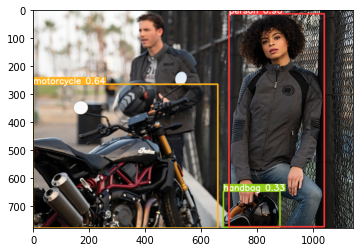

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
results.xyxy # This line of code is just giving you [xmin, ymin, xmax, ymax, confidence, class]

[tensor([[6.99388e+02, 1.35621e+01, 1.03905e+03, 7.72364e+02, 9.04849e-01, 0.00000e+00],
         [0.00000e+00, 2.64651e+02, 6.59613e+02, 7.77000e+02, 6.40178e-01, 3.00000e+00],
         [6.79810e+02, 6.45691e+02, 8.81512e+02, 7.74135e+02, 3.34385e-01, 2.60000e+01]])]

# 3 cv2 Detection

In [49]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results=model(frame)
    
    cv2.imshow("YOLO,", np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

# 4 Training

In [13]:
import uuid
import os
import time

In [14]:
IMAGES_PATH = os.path.join("data", "images")
label = ["awake", "drowsy"]
number_img = 20

In [60]:
cap = cv2.VideoCapture(0)

# looping through collecting images
for labels in label:
    print(f'Collecting image for {labels}')
    time.sleep(4)
    
    # looping through range of images
    for num_img in range(number_img):
        print(f"Collecting image for {labels} and number is {num_img}")
        
        ret, frame = cap.read()
        # Naming our image path basically we are giving it our path memory address
        img_name = os.path.join(IMAGES_PATH, labels + '.' + str(uuid.uuid1()) + '.jpg')
        
         # Writing our img_name to file
        cv2.imwrite(img_name, frame)
        
        # It is just collicting images for rendering
        cv2.imshow("Collecting image", frame)
        
        # Giving it rest of 2s and you can increase and decrease it as well
        time.sleep(2)


        if cv2.waitKey(10) & 0xff ==ord('q'):
            break
    
cap.release()
cv2.destroyAllWindows()
    

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [15]:
# Cloning github repository for labeling our images
! git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [16]:
# Installing dependecies for our labeling repository 
! pip install pyqt5 lxml --upgrade
! cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [18]:
! cd yolov5 && python train.py --img 320 --batch 16 --epochs 20 --data dataset.yml --weights yolov5m.pt --workers 2
# and increase the size of the epochs if you don't get any result but don't come as overfit the model

^C


# 5 Load The Model

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\SHRIYADAV/.cache\torch\hub\master.zip
YOLOv5  2021-9-11 torch 1.8.2+cpu CPU

Fusing layers... 
Model Summary: 308 layers, 21102294 parameters, 0 gradients, 50.5 GFLOPs
Adding AutoShape... 


In [23]:
image = os.path.join('data', 'images','awake.8fac3c4a-10b0-11ec-acf0-182649dd2af7.jpg')

In [24]:
results = model(image)

In [25]:
results.print()
# i am not getting any detection because i didn't train it for long and it is taking pretty much long time to run on cpu but it will work on GPU well and also i download yolov5s version try it's M version it will guve you hypothesis.

image 1/1: 480x640 (no detections)
Speed: 18.1ms pre-process, 1345.3ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


In [21]:
results.save()

Saved 1 image to runs\detect\exp22


In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()